In [127]:
import gensim
import numpy as np
import nltk
import re
import pymorphy2
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from copy import deepcopy
import matplotlib.pyplot as plt

In [9]:
text = "«Сухой» ответил на идею переименовать Superjet 100. Новое название лайнера может понадобиться после создания «обновленного, востребованного рынком продукта». Ранее о возможном ребрендинге говорил глава «Ростеха» Сергей Чемезов. Компания «Гражданские самолеты Сухого» (входит в ОАК) может переименовать самолет Sukhoi Superjet 100 (SSJ100) после его модернизации в рамках политики импортозамещения. Об этом пишет ТАСС со ссылкой на пресс-службу ГСС. Модернизация позволит повысить безопасность и комфортность самолета и улучшить экономику эксплуатации лайнера, пояснили в компании. Там уточнили, что в том числе рассматривают смену названия после создания «востребованного рынком продукта». «Просто дать новое имя — не самоцель, его [обновленный самолет] нужно создать, нужно, чтобы было, что называть по-новому», — заключили в пресс-службе. При этом в рамках модернизации самолет должен стать «одним из лучших в своем классе», заявили в «Сухом». Чемезов заявил о возможном ребрендинге Superjet. В сентябрьском интервью РБК появление нового названия для SSJ100 также допускал глава «Ростеха» (в состав госкорпорации передали ОАК) Сергей Чемезов. «Что касается ребрендинга — может быть, действительно надо сделать. Тем более можно сделать наше российское название», — заявил он и отметил, что необходимо снизить зависимость от иностранных комплектующих в самолете. Комментируя претензии различных авиакомпаний к самолетам, Чемезов утверждал, что речь идет о «детских болезнях» SSJ100, которые «пройдут со временем». СМИ узнали о претензиях к SSJ100 из-за перегрузок при взлетах и посадках. На фоне майской катастрофы с SSJ100 «Аэрофлота» в Шереметьево, в которой погиб 41 человек, недовольство лайнерами высказывали его эксплуатанты, в частности «Ямал». Кроме того, как в августе писали «Ведомости» и ранее сообщали источники РБК, от SSJ100 планирует отказаться один из крупнейших зарубежных заказчиков — мексиканская Interjet. По данным собеседников РБК, у компании возникли претензии к послепродажному обслуживанию самолетов. В ГСС эту информацию отрицали."

In [10]:
text

'«Сухой» ответил на идею переименовать Superjet 100. Новое название лайнера может понадобиться после создания «обновленного, востребованного рынком продукта». Ранее о возможном ребрендинге говорил глава «Ростеха» Сергей Чемезов. Компания «Гражданские самолеты Сухого» (входит в ОАК) может переименовать самолет Sukhoi Superjet 100 (SSJ100) после его модернизации в рамках политики импортозамещения. Об этом пишет ТАСС со ссылкой на пресс-службу ГСС. Модернизация позволит повысить безопасность и комфортность самолета и улучшить экономику эксплуатации лайнера, пояснили в компании. Там уточнили, что в том числе рассматривают смену названия после создания «востребованного рынком продукта». «Просто дать новое имя — не самоцель, его [обновленный самолет] нужно создать, нужно, чтобы было, что называть по-новому», — заключили в пресс-службе. При этом в рамках модернизации самолет должен стать «одним из лучших в своем классе», заявили в «Сухом». Чемезов заявил о возможном ребрендинге Superjet. В се

In [75]:
pretrained_ft = gensim.models.fasttext.load_facebook_model('ru.bin', encoding='utf-8')

In [126]:
def preprocessing_rus(sentence):
    sentence = sentence.lower()
    sentence = re.sub('[^А-Яа-яA-Za-z]+', ' ', sentence).strip()
    return sentence

def mean_sent_vector(sentence_tokens):
    return np.array([np.mean([pretrained_ft[w] for w in sentence_tokens if w in pretrained_ft]
                     or [np.zeros(300)], axis=0)])

sents = nltk.sent_tokenize(text)
sents_storage = deepcopy(sents)

for i in range(len(sents)):
    sents[i] = preprocessing_rus(sents[i])
    sents[i] = nltk.tokenize.word_tokenize(sents[i])
    for j in range(len(sents[i])):
        sents[i][j] = pymorphy2.MorphAnalyzer().parse(sents[i][j])[0].normal_form

In [128]:
sents_storage

['«Сухой» ответил на идею переименовать Superjet 100.',
 'Новое название лайнера может понадобиться после создания «обновленного, востребованного рынком продукта».',
 'Ранее о возможном ребрендинге говорил глава «Ростеха» Сергей Чемезов.',
 'Компания «Гражданские самолеты Сухого» (входит в ОАК) может переименовать самолет Sukhoi Superjet 100 (SSJ100) после его модернизации в рамках политики импортозамещения.',
 'Об этом пишет ТАСС со ссылкой на пресс-службу ГСС.',
 'Модернизация позволит повысить безопасность и комфортность самолета и улучшить экономику эксплуатации лайнера, пояснили в компании.',
 'Там уточнили, что в том числе рассматривают смену названия после создания «востребованного рынком продукта».',
 '«Просто дать новое имя — не самоцель, его [обновленный самолет] нужно создать, нужно, чтобы было, что называть по-новому», — заключили в пресс-службе.',
 'При этом в рамках модернизации самолет должен стать «одним из лучших в своем классе», заявили в «Сухом».',
 'Чемезов заявил о

In [111]:
sent_vectors = []
for sent in sents:
    sent_vectors.append(np.squeeze(mean_sent_vector(sent)))
sent_vectors = np.asarray(sent_vectors)

/Users/user007/Documents/Workspace/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/Users/user007/Documents/Workspace/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [129]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters).fit(sent_vectors)

In [122]:
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(sent_vectors)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)

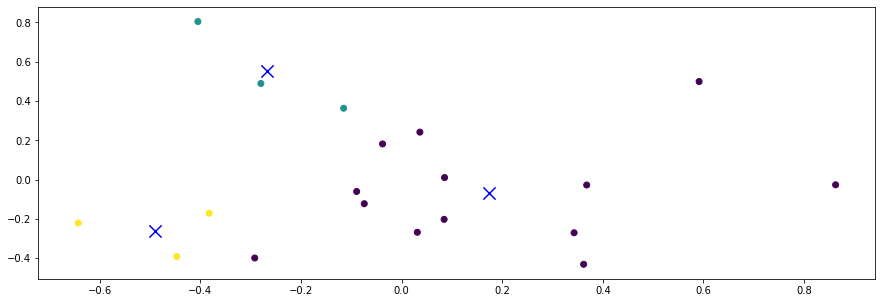

In [123]:
plt.figure(figsize=(15,5))
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmeans.predict(sent_vectors))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [218]:
centre_sents_idx = []
for j in range(n_clusters):
    idx_cand = np.where(kmeans.labels_ == j)
    vec_cand = sent_vectors[idx_cand]
    closest, dist = pairwise_distances_argmin_min([kmeans.cluster_centers_[j]], vec_cand)
    centre_sents_idx.append(idx_cand[0][int(closest)])
centre_sents_idx = sorted(centre_sents_idx)
#     print(closest)

In [221]:
summary = ' '.join([sents_storage[i] for i in centre_sents_idx])


In [222]:
print(summary)

Компания «Гражданские самолеты Сухого» (входит в ОАК) может переименовать самолет Sukhoi Superjet 100 (SSJ100) после его модернизации в рамках политики импортозамещения. Об этом пишет ТАСС со ссылкой на пресс-службу ГСС. «Просто дать новое имя — не самоцель, его [обновленный самолет] нужно создать, нужно, чтобы было, что называть по-новому», — заключили в пресс-службе.
